In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import f1_score
from google.colab import drive
from pandas import read_hdf
import matplotlib.pyplot as plt
from scipy.stats import randint as sp_randint
from scipy.stats import uniform

In [ ]:
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
#reading

df_final_train = pd.read_hdf('/content/drive/My Drive/FB Recommendation data/data/fea_sample/storage_sample_stage4.h5', 'train_df',mode='r')
df_final_test = pd.read_hdf('/content/drive/My Drive/FB Recommendation data/data/fea_sample/storage_sample_stage4.h5', 'test_df',mode='r')

In [ ]:
df_final_train.columns

Index(['source_node', 'destination_node', 'indicator_link',
       'jaccard_followers', 'jaccard_followees', 'cosine_followers',
       'cosine_followees', 'num_followers_s', 'num_followees_s',
       'num_followees_d', 'inter_followers', 'inter_followees', 'adar_index',
       'follows_back', 'same_comp', 'shortest_path', 'weight_in', 'weight_out',
       'weight_f1', 'weight_f2', 'weight_f3', 'weight_f4', 'page_rank_s',
       'page_rank_d', 'katz_s', 'katz_d', 'hubs_s', 'hubs_d', 'authorities_s',
       'authorities_d', 'svd_u_s_1', 'svd_u_s_2', 'svd_u_s_3', 'svd_u_s_4',
       'svd_u_s_5', 'svd_u_s_6', 'svd_u_d_1', 'svd_u_d_2', 'svd_u_d_3',
       'svd_u_d_4', 'svd_u_d_5', 'svd_u_d_6', 'svd_v_s_1', 'svd_v_s_2',
       'svd_v_s_3', 'svd_v_s_4', 'svd_v_s_5', 'svd_v_s_6', 'svd_v_d_1',
       'svd_v_d_2', 'svd_v_d_3', 'svd_v_d_4', 'svd_v_d_5', 'svd_v_d_6'],
      dtype='object')

In [ ]:
y_train = df_final_train.indicator_link
y_test = df_final_test.indicator_link

In [ ]:
df_final_train.drop(['source_node', 'destination_node','indicator_link'],axis = 1,inplace=True)
df_final_test.drop(['source_node', 'destination_node','indicator_link'],axis = 1,inplace=True)

# **RANDOM FOREST CLASSIFIER**

**Using GridsearchCV**

Estimator =  10 train score 0.9063252121775113 test score 0.8745605278006858
Estimator =  50 train score 0.9205725512208812 test score 0.9125653355634538
Estimator =  100 train score 0.9238690848446947 test score 0.9141199714153599
Estimator =  250 train score 0.9239789348046863 test score 0.9188007232664732
Estimator =  450 train score 0.9237190618658074 test score 0.9161507685828595


Text(0.5, 1.0, 'Estimators vs score at depth of 5')

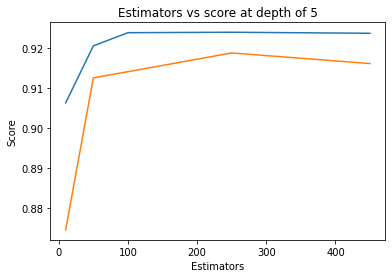

In [ ]:
estimator = [10,50,100,250,450]

train_scores = []
test_scores = []

for i in estimator:

  clf = RandomForestClassifier(bootstrap =True,class_weight =None,criterion = 'gini',max_depth=5,max_features='auto',max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=52, min_samples_split=120,
            min_weight_fraction_leaf=0.0, n_estimators=i, n_jobs=-1,random_state=25,verbose=0,warm_start=False)
  
  clf.fit(df_final_train,y_train)
  train_sc = f1_score(y_train,clf.predict(df_final_train))
  test_sc = f1_score(y_test,clf.predict(df_final_test))

  train_scores.append(train_sc)
  test_scores.append(test_sc)
  print('Estimator = ',i,'train score',train_sc,'test score',test_sc)

plt.plot(estimator,train_scores,label='Train Score')

plt.plot(estimator,test_scores,label='Test Score')

plt.xlabel('Estimators')
plt.ylabel('Score')
plt.title('Estimators vs score at depth of 5')


Depth =  3 train score 0.8916120853581238 test score 0.8687934859875491
Depth =  9 train score 0.9572226298198419 test score 0.9222953031452904
Depth =  11 train score 0.9623451340902863 test score 0.9252318758281279
Depth =  15 train score 0.9634267621927706 test score 0.9231288356496615
Depth =  20 train score 0.9631629153051491 test score 0.9235051024711141
Depth =  35 train score 0.9634333127085721 test score 0.9235601652753184
Depth =  50 train score 0.9634333127085721 test score 0.9235601652753184
Depth =  70 train score 0.9634333127085721 test score 0.9235601652753184
Depth =  130 train score 0.9634333127085721 test score 0.9235601652753184


Text(0.5, 1.0, 'Depth vs Score estimator =115')

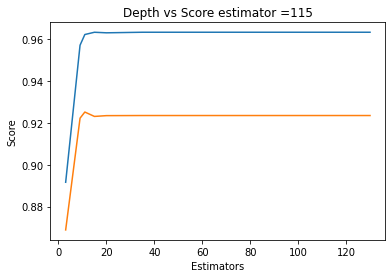

In [ ]:
depth = [3,9,11,15,20,35,50,70,130]

train_scores = []
test_scores = []

for i in depth:

  clf = RandomForestClassifier(bootstrap =True,class_weight =None,criterion = 'gini',max_depth=i,max_features='auto',max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=52, min_samples_split=120,
            min_weight_fraction_leaf=0.0, n_estimators=115, n_jobs=-1,random_state=25,verbose=0,warm_start=False)
  
  clf.fit(df_final_train,y_train)
  train_sc = f1_score(y_train,clf.predict(df_final_train))
  test_sc = f1_score(y_test,clf.predict(df_final_test))

  train_scores.append(train_sc)
  test_scores.append(test_sc)
  print('Depth = ',i,'train score',train_sc,'test score',test_sc)

plt.plot(depth,train_scores,label='Train Score')

plt.plot(depth,test_scores,label='Test Score')

plt.xlabel('Estimators')
plt.ylabel('Score')
plt.title('Depth vs Score estimator =115')

**RandomizedSearchCV**

In [ ]:
from scipy.stats import randint as sp_randint
from scipy.stats import uniform

param_dist = {"n_estimators":sp_randint(105,125),
              "max_depth": sp_randint(10,15),
              "min_samples_split": sp_randint(110,190),
              "min_samples_leaf": sp_randint(25,65)}

clf = RandomForestClassifier(random_state=25,n_jobs=-1)

rf_random = RandomizedSearchCV(clf, param_distributions=param_dist,
                                   n_iter=5,cv=10,scoring='f1',random_state=25)

rf_random.fit(df_final_train,y_train)

RandomizedSearchCV(cv=10, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
              

In [ ]:
print(rf_random.best_estimator_)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=14, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=28, min_samples_split=111,
                       min_weight_fraction_leaf=0.0, n_estimators=121,
                       n_jobs=-1, oob_score=False, random_state=25, verbose=0,
                       warm_start=False)


In [ ]:
 clf = RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=14, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=28, min_samples_split=111,
                       min_weight_fraction_leaf=0.0, n_estimators=121,
                       n_jobs=-1, oob_score=False, random_state=25, verbose=0,
                       warm_start=False)

In [ ]:
clf.fit(df_final_train,y_train)
y_train_pred = clf.predict(df_final_train)
y_test_pred = clf.predict(df_final_test)

In [ ]:
print('Train f1 score',f1_score(y_train,y_train_pred))
print('Test f1 score',f1_score(y_test,y_test_pred))

Train f1 score 0.9652533106548414
Test f1 score 0.9241678239279553


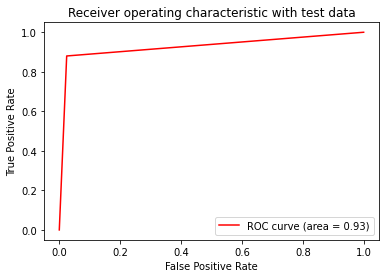

In [ ]:
from sklearn.metrics import roc_curve,auc

fpr,tpr,thres = roc_curve(y_test,y_test_pred)

auc_sc = auc(fpr,tpr)
plt.plot(fpr,tpr,color='red',label='ROC curve (area = %0.2f)' % auc_sc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic with test data')
plt.legend()
plt.show()